### Import the data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/PhiUSIIL_Phishing_URL_Dataset.csv')

In [4]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [11]:
data.shape

(235795, 56)

In [ ]:
# Check whether there are duplicated values

In [6]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
235790    False
235791    False
235792    False
235793    False
235794    False
Length: 235795, dtype: bool

In [ ]:
# Check for null values

In [7]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Feature Reduction

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
 # Drop non-numeric columns that are not useful for feature selection

In [12]:
data_cleaned = data.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD', 'Title'])

In [ ]:
 # Separate features and target

In [13]:
X = data_cleaned.drop(columns=['label'])
y = data_cleaned['label']

In [16]:
# Take a random sample to reduce memory usage since dataset is large

In [15]:
data_sampled = data_cleaned.sample(frac=0.1, random_state=42)
X_sample = data_sampled.drop(columns=['label'])
y_sample = data_sampled['label']

In [17]:
# Split the sampled data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [19]:
# Train a Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Get feature importance

In [22]:
feature_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [23]:
# Select top 15 features

In [24]:
top_15_features = feature_importance.head(15)
print("Top 15 Features based on Importance:\n", top_15_features)

Top 15 Features based on Importance:
                        Feature  Importance
49             NoOfExternalRef    0.166284
3           URLSimilarityIndex    0.165999
22                  LineOfCode    0.152442
47                 NoOfSelfRef    0.104598
44                   NoOfImage    0.086597
46                      NoOfJS    0.077209
36                HasSocialNet    0.031799
45                     NoOfCSS    0.031603
43            HasCopyrightInfo    0.026877
21                     IsHTTPS    0.021487
32              HasDescription    0.019350
23           LargestLineLength    0.019154
14             NoOfDegitsInURL    0.013200
19  NoOfOtherSpecialCharsInURL    0.011261
15             DegitRatioInURL    0.010715


In [28]:
# Select the top 15 features and the label column

In [29]:
selected_columns = top_15_features['Feature'].tolist() + ['label']
new_dataset = data_cleaned[selected_columns]

In [30]:
new_dataset.head()

,NoOfExternalRef,URLSimilarityIndex,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,HasDescription,LargestLineLength,NoOfDegitsInURL,NoOfOtherSpecialCharsInURL,DegitRatioInURL,label
0,124,100.0,558,119,34,28,0,20,1,1,0,9381,0,1,0.0,1
1,217,100.0,618,39,50,8,1,9,1,1,0,9381,0,2,0.0,1
2,5,100.0,467,42,10,7,0,2,1,1,1,682,0,2,0.0,1
3,31,100.0,6356,22,3,15,1,27,1,1,0,26824,0,1,0.0,1
4,85,100.0,6089,72,244,34,1,15,1,1,1,28404,0,1,0.0,1


In [31]:
new_dataset.to_csv('top_15_features_dataset.csv', index=False)

In [37]:
data = pd.read_csv('top_15_features_dataset.csv')

In [38]:
data.head()

,NoOfExternalRef,URLSimilarityIndex,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,HasDescription,LargestLineLength,NoOfDegitsInURL,NoOfOtherSpecialCharsInURL,DegitRatioInURL,label
0,124,100.0,558,119,34,28,0,20,1,1,0,9381,0,1,0.0,1
1,217,100.0,618,39,50,8,1,9,1,1,0,9381,0,2,0.0,1
2,5,100.0,467,42,10,7,0,2,1,1,1,682,0,2,0.0,1
3,31,100.0,6356,22,3,15,1,27,1,1,0,26824,0,1,0.0,1
4,85,100.0,6089,72,244,34,1,15,1,1,1,28404,0,1,0.0,1


In [40]:
X = new_dataset.drop(columns=['label'])
y = new_dataset['label']

In [41]:
X

,NoOfExternalRef,URLSimilarityIndex,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,HasDescription,LargestLineLength,NoOfDegitsInURL,NoOfOtherSpecialCharsInURL,DegitRatioInURL
0,124,100.000000,558,119,34,28,0,20,1,1,0,9381,0,1,0.000
1,217,100.000000,618,39,50,8,1,9,1,1,0,9381,0,2,0.000
2,5,100.000000,467,42,10,7,0,2,1,1,1,682,0,2,0.000
3,31,100.000000,6356,22,3,15,1,27,1,1,0,26824,0,1,0.000
4,85,100.000000,6089,72,244,34,1,15,1,1,1,28404,0,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,191,100.000000,2007,187,51,21,1,7,1,1,1,9381,0,1,0.000
235791,31,100.000000,1081,88,50,7,1,1,0,1,1,348,0,2,0.000
235792,67,100.000000,709,58,27,30,1,10,1,1,1,13277,0,1,0.000
235793,0,28.157537,125,0,0,3,0,0,0,1,0,1807,3,5,0.055


In [42]:
y

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [48]:
X_train.shape

(212215, 15)

In [49]:
X_test.shape

(23580, 15)

In [51]:
# Check whether data set is imbalanced

In [53]:
y_train.value_counts()

label
1    121544
0     90671
Name: count, dtype: int64

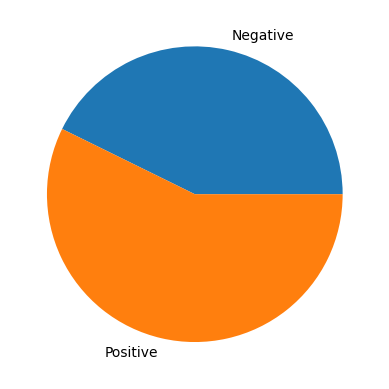

In [54]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

### Handle Imbalanced dataset

In [56]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(243088, 15) (243088,)


In [61]:
y_train_smote.value_counts()

label
1    121544
0    121544
Name: count, dtype: int64

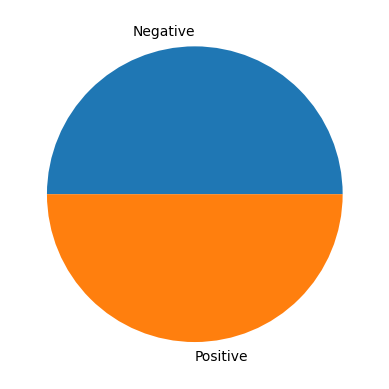

In [62]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

## Model Training and Evaluation

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

y_train_pred = lr.predict(X_train_smote)
y_test_pred = lr.predict(X_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.996
	Precision = 0.996
	Recall = 0.996
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.996
	Precision = 0.997
	Recall = 0.996
	F1-Score = 0.997


D:\Projects\phishing-link-detector\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=200, random_state=42))
])

pipeline.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=200, random_state=42))])

In [80]:
y_train_pred = pipeline.predict(X_train_smote)
y_test_pred = pipeline.predict(X_test)

In [83]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [82]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 1.0
	Precision = 0.999
	Recall = 1.0
	F1-Score = 1.0


### Random Forest

In [86]:
rf = RandomForestClassifier()

rf.fit(X_train_smote, y_train_smote)

y_train_pred = rf.predict(X_train_smote)

y_test_pred = rf.predict(X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
